In [2]:
import pandas as pd
from glob import glob
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from Keras.Models import Sequential
from Keras.Layers import Dense
import Keras.Backend as K
from Keras.Callbacks import EarlyStopping
from Keras.Optimisers import Adam
from Keras.Models import load_model
from Keras.Layers import LSTM
from Keras.utils.vis_utils import plot_model

ModuleNotFoundError: No module named 'tensorflow'

In [36]:
stock_files = sorted(glob('D:\\Datasets\\data\\data (*).csv'))
stock_files

['D:\\Datasets\\data\\data (1).csv',
 'D:\\Datasets\\data\\data (10).csv',
 'D:\\Datasets\\data\\data (11).csv',
 'D:\\Datasets\\data\\data (12).csv',
 'D:\\Datasets\\data\\data (13).csv',
 'D:\\Datasets\\data\\data (14).csv',
 'D:\\Datasets\\data\\data (15).csv',
 'D:\\Datasets\\data\\data (16).csv',
 'D:\\Datasets\\data\\data (17).csv',
 'D:\\Datasets\\data\\data (18).csv',
 'D:\\Datasets\\data\\data (19).csv',
 'D:\\Datasets\\data\\data (2).csv',
 'D:\\Datasets\\data\\data (20).csv',
 'D:\\Datasets\\data\\data (21).csv',
 'D:\\Datasets\\data\\data (22).csv',
 'D:\\Datasets\\data\\data (23).csv',
 'D:\\Datasets\\data\\data (24).csv',
 'D:\\Datasets\\data\\data (25).csv',
 'D:\\Datasets\\data\\data (26).csv',
 'D:\\Datasets\\data\\data (27).csv',
 'D:\\Datasets\\data\\data (28).csv',
 'D:\\Datasets\\data\\data (29).csv',
 'D:\\Datasets\\data\\data (3).csv',
 'D:\\Datasets\\data\\data (30).csv',
 'D:\\Datasets\\data\\data (31).csv',
 'D:\\Datasets\\data\\data (32).csv',
 'D:\\Datasets\

In [37]:
df=pd.concat((pd.read_csv(file).assign(filename = file)
         for file in stock_files), ignore_index = True)

In [38]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,filename,Company Name,Industry,ISIN Code
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372.0,1.725876e+15,NaN,5206360.0,0.3042,D:\Datasets\data\data (1).csv,NaN,NaN,NaN
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400.0,4.982865e+14,NaN,1294899.0,0.2561,D:\Datasets\data\data (1).csv,NaN,NaN,NaN
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750.0,3.715586e+14,NaN,976527.0,0.2549,D:\Datasets\data\data (1).csv,NaN,NaN,NaN
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151.0,3.005106e+14,NaN,701664.0,0.2294,D:\Datasets\data\data (1).csv,NaN,NaN,NaN
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332.0,2.602133e+14,NaN,695234.0,0.2624,D:\Datasets\data\data (1).csv,NaN,NaN,NaN


In [39]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [40]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

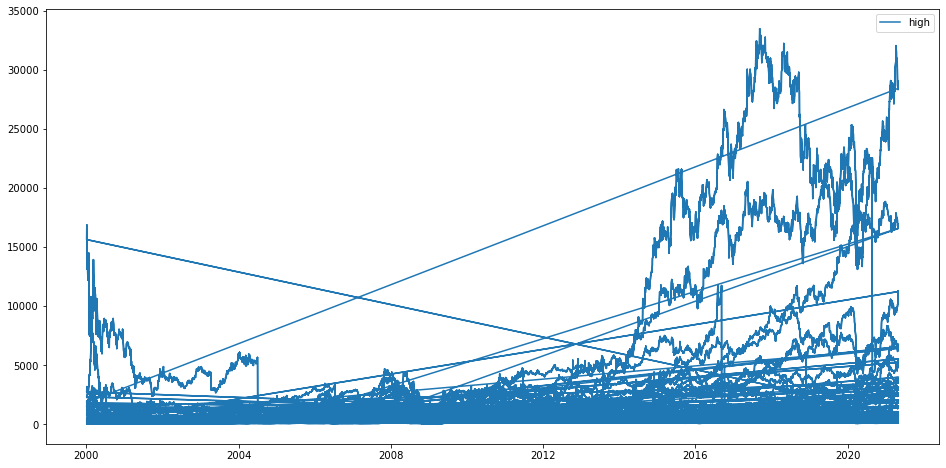

In [41]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['High'], label='high')
#plt.plot(df['Close'], label='Close Price history')
plt.legend()

In [42]:
df.groupby('Symbol').mean()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Symbol,,,,,,,,,,,,
ADANIPORTS,293.853154,294.420705,299.126599,289.125642,294.103306,294.111766,294.270552,3.909287e+06,1.403270e+14,47114.489778,1.562282e+06,0.438252
ASIANPAINT,1247.000952,1247.683952,1264.625349,1230.900697,1247.317132,1247.410903,1247.799926,5.096721e+05,6.942919e+13,41346.011401,2.751281e+05,0.625572
AXISBANK,824.024308,824.703020,838.289702,809.950545,824.035961,824.058898,824.204196,6.916522e+06,4.238762e+14,120602.231678,2.732563e+06,0.417343
BAJAJ-AUTO,2189.871065,2191.537883,2219.934510,2162.215209,2190.307917,2190.412196,2191.294288,4.114639e+05,9.644024e+13,27487.876629,1.944837e+05,0.509401
BAJAJFINSV,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
...,...,...,...,...,...,...,...,...,...,...,...,...
UTIBANK,162.826621,163.685225,167.231904,159.524451,163.176543,163.126203,163.378478,2.879499e+05,7.918100e+12,NaN,1.967664e+05,0.586996
VEDL,183.268455,183.575911,186.638225,180.105297,183.306579,183.293489,183.416734,1.564060e+07,2.571171e+14,79301.257085,4.826880e+06,0.312982
WIPRO,754.857303,756.799981,772.478364,738.150886,754.522418,754.474783,755.165515,2.236123e+06,1.024537e+14,48112.935668,9.957321e+05,0.459096


In [43]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [46]:
#Building the LSTM Model
lstm = sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

NameError: name 'sequential' is not defined